In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
%matplotlib inline
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

In [2]:
svec = loadtxt("../Data/3x3-qe/n.cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))

In [6]:
n_data = loadtxt("../Data/3x3-qe/n.pos")
m_data = loadtxt("../Data/3x3-qe/p1.pos")

n_atom = dot(n_data,svec)
n_atom = n_atom-n_atom[0]+(rvec[1]+rvec[0])/3
# n_atom = n_atom-n_atom[0]

m_atom = dot(m_data,svec)
m_atom = m_atom-m_atom[0]
m_atom += average(n_atom[:9]-m_atom[:9],axis=0)

u = around(m_atom - n_atom,8)

In [7]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
#     plt.scatter(0,0,c="blue",s=s2,label="Nb")
#     plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:18].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:18].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,2,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,6,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [1,4,5]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
#     plt.title("Nb Displacement")
#     plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("../Plot/3x3_p1_nb.png",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

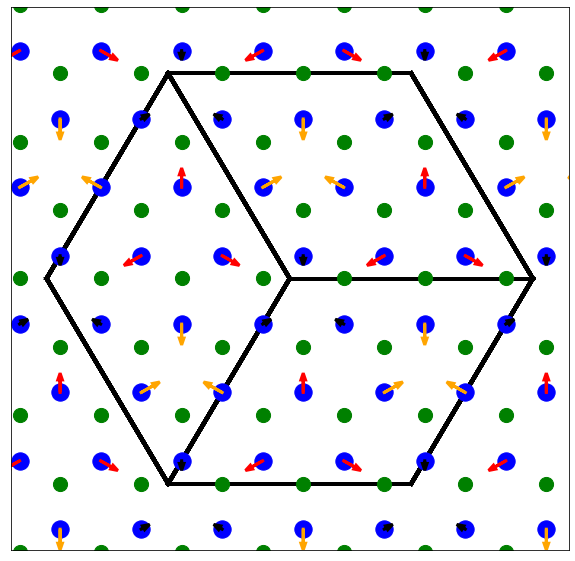

In [8]:
plot_lattice()

In [9]:
def rotate(obj,angle):
    r_matrix = array([[cos(angle),sin(angle)],[-sin(angle),cos(angle)]])
    return (dot(r_matrix,obj))

In [10]:
s_rot = rotate(svec.T[:2],pi/6).T
s_rot1 = rotate(svec.T[:2],pi/6+2*pi/3).T
s_rot2 = rotate(svec.T[:2],pi/6+4*pi/3).T

In [11]:
n_rot = rotate(n_atom.T[:2],pi/6).T
n1_rot = rotate(n_atom.T[:2],pi/6+2*pi/3).T
n2_rot = rotate(n_atom.T[:2],pi/6+4*pi/3).T

In [12]:
m_rot = rotate(m_atom.T[:2],pi/6).T
m1_rot = rotate(m_atom.T[:2],pi/6+2*pi/3).T
m2_rot = rotate(m_atom.T[:2],pi/6+4*pi/3).T

In [29]:
u_rot = m_rot-n_rot
u1_rot = m1_rot - n1_rot
u2_rot = m2_rot - n2_rot

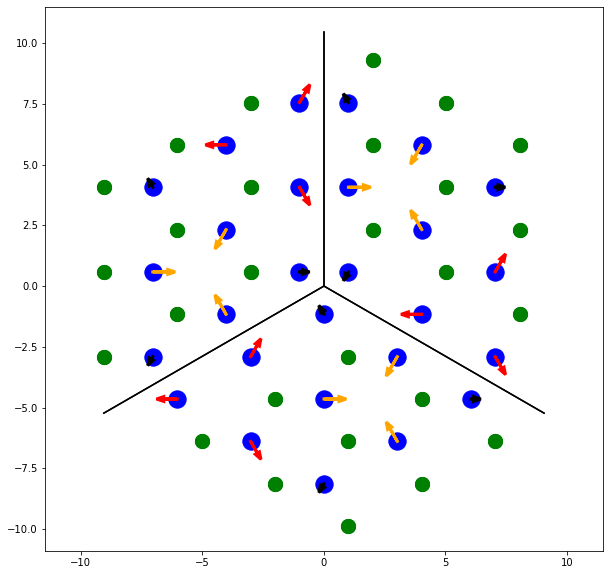

In [30]:
fig = plt.figure(figsize=(10,10))
s1, s2 = 300,200
hw=0.2
for v in s_rot:
    plt.plot([0,v[0]],[0,v[1]],c="black")
for v in s_rot1:
    plt.plot([0,v[0]],[0,v[1]],c="black")
for v in s_rot2:
    plt.plot([0,v[0]],[0,v[1]],c="black")

for i in range(9):
    plt.scatter(n_rot[i][0],n_rot[i][1],c="blue",s=s1)
    plt.scatter(n1_rot[i][0],n1_rot[i][1],c="blue",s=s1)
    plt.scatter(n2_rot[i][0],n2_rot[i][1],c="blue",s=s1)
for i in range(9,27):
    plt.scatter(n_rot[i][0],n_rot[i][1],c="green",s=s2)
    plt.scatter(n1_rot[i][0],n1_rot[i][1],c="green",s=s2)
    plt.scatter(n2_rot[i][0],n2_rot[i][1],c="green",s=s2)
    
for k in [0,2,8]:
    plt.arrow(n_rot[k][0],n_rot[k][1],(u_rot[:,0][k])*10,(u_rot[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
for k in [3,6,7]:
    plt.arrow(n_rot[k][0],n_rot[k][1],(u_rot[:,0][k])*10,(u_rot[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,4,5]:
    plt.arrow(n_rot[k][0],n_rot[k][1],(u_rot[:,0][k])*10,(u_rot[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)       
    
for k in [0,2,8]:
    plt.arrow(n1_rot[k][0],n1_rot[k][1],(u1_rot[:,0][k])*10,(u1_rot[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
for k in [3,6,7]:
    plt.arrow(n1_rot[k][0],n1_rot[k][1],(u1_rot[:,0][k])*10,(u1_rot[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,4,5]:
    plt.arrow(n1_rot[k][0],n1_rot[k][1],(u1_rot[:,0][k])*10,(u1_rot[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)           

for k in [0,2,8]:
    plt.arrow(n2_rot[k][0],n2_rot[k][1],(u2_rot[:,0][k])*10,(u2_rot[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
for k in [3,6,7]:
    plt.arrow(n2_rot[k][0],n2_rot[k][1],(u2_rot[:,0][k])*10,(u2_rot[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,4,5]:
    plt.arrow(n2_rot[k][0],n2_rot[k][1],(u2_rot[:,0][k])*10,(u2_rot[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)           
    
    
# for nb in m_rot[:9]:
#     plt.a(nb[0],nb[1],c="blue")
# for nb in m1_rot[:9]:
#     plt.scatter(nb[0],nb[1],c="blue")
# for nb in m2_rot[:9]:
#     plt.scatter(nb[0],nb[1],c="blue")
    
plt.axis("equal")
plt.show()

In [156]:
def plot_lattice():
    plt.plot(s_rot())
    for nb in a_rot[:9]:
        plt.scatter(nb[0],nb[1],c="blue")

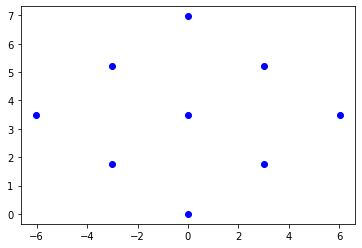

In [84]:
plot_lattice()